#### Try to predict the close price of AMD actions using LSTM, ARIMA, SARIMA and RNN to compare the difference and how they handle with data :

In [239]:
import tensorflow as tf

if tf.test.gpu_device_name():
  print('Available')
else:
  print('Its not available!')

Its not available!


In [240]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [241]:
!gdown 1GO08KWygLuP9AEeqod7JBB6NKjXnmMn9
!gdown 1TSFtKelIUizWeum0QXOMNJiF2CZ4s58c

Downloading...
From: https://drive.google.com/uc?id=1GO08KWygLuP9AEeqod7JBB6NKjXnmMn9
To: /content/AMD (1980 -11.07.2023).csv
100% 730k/730k [00:00<00:00, 16.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TSFtKelIUizWeum0QXOMNJiF2CZ4s58c
To: /content/AMD (2023 - 08.04.2024).csv
100% 23.3k/23.3k [00:00<00:00, 45.7MB/s]


#### Reading and analysing the dataset :

In [242]:
import pandas as pd

train = pd.read_csv('AMD (1980 -11.07.2023).csv')
test = pd.read_csv('AMD (2023 - 08.04.2024).csv')

In [243]:
print(f'train shape: {train.shape}')
print(f'test shape: {test.shape}')

train shape: (10919, 7)
test shape: (316, 7)


In [244]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
1,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
2,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
3,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800
4,1980-03-24,0.0,2.916667,2.635417,2.666667,2.666667,436800


In [245]:
df_train = train[['Date', 'Close']]
df_test = test[['Date', 'Close']]

In [246]:
df_train.head()

,Date,Close
0,1980-03-18,3.031250
1,1980-03-19,3.041667
2,1980-03-20,3.010417
3,1980-03-21,2.916667
4,1980-03-24,2.666667


In [247]:
df_train.describe()

,Close
count,10919.000000
mean,17.138932
std,23.121619
min,1.620000
25%,5.300000
50%,9.875000
75%,16.120001
max,161.910004


In [248]:
index_min = df_train['Close'].idxmin()
index_max = df_train['Close'].idxmax()

In [249]:
index_min

8917

In [250]:
print(f'The Date of min was : {df_train.iloc[index_min, 0]}')
print(f'The Date of max was : {df_train.iloc[index_max, 0]}')

The Date of min was : 2015-07-27
The Date of max was : 2021-11-29


In [251]:
df_train[index_min:].head()

,Date,Close
8917,2015-07-27,1.62
8918,2015-07-28,1.77
8919,2015-07-29,1.96
8920,2015-07-30,1.93
8921,2015-07-31,1.93


In [252]:
df_train[index_max:].head()

,Date,Close
10515,2021-11-29,161.910004
10516,2021-11-30,158.369995
10517,2021-12-01,149.110001
10518,2021-12-02,150.679993
10519,2021-12-03,144.009995


In [253]:
df_train.loc[:, 'Date'] = pd.to_datetime(df_train['Date'])
df_test.loc[:, 'Date'] = pd.to_datetime(df_test['Date'])

#### Ploting all the graphics :

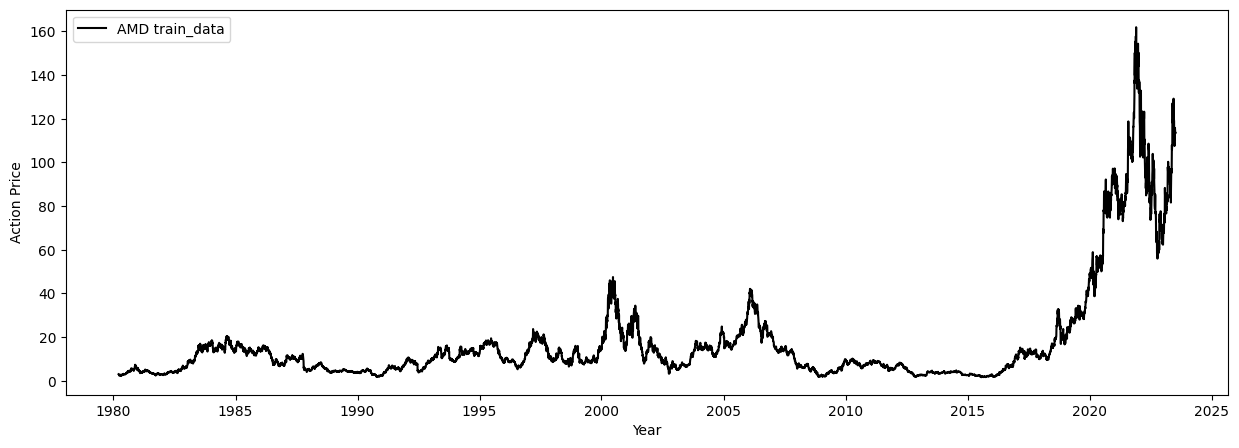

In [254]:
#Ploting the train data :

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))
plt.plot(df_train['Date'], df_train['Close'], color = 'black', label='AMD train_data')
plt.xlabel('Year')
plt.ylabel('Action Price')
plt.legend()
plt.show()

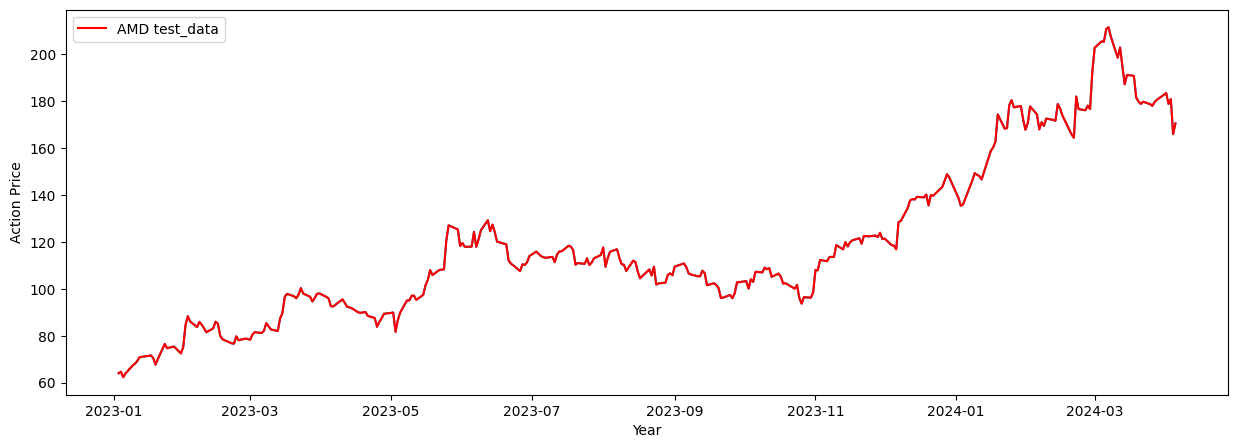

In [255]:
#Ploting the test data :

plt.figure(figsize=(15,5))
plt.plot(df_test['Date'], df_test['Close'])
plt.plot(df_test['Date'], df_test['Close'], color = 'red', label='AMD test_data')
plt.xlabel('Year')
plt.ylabel('Action Price')
plt.legend()
plt.show()

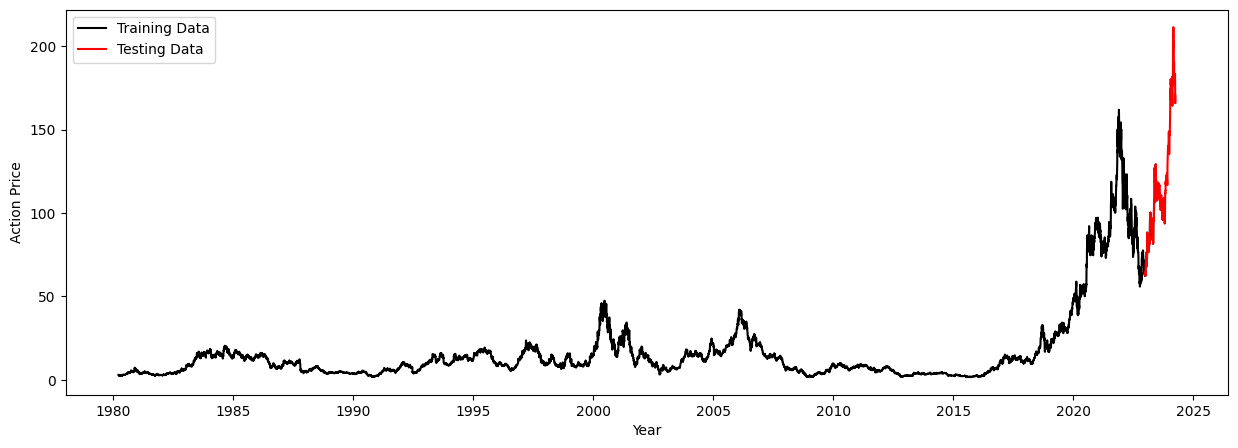

In [256]:
#Ploting both in sequence:
import numpy as np

plot_both = pd.concat([df_train, df_test], axis=0)

plt.figure(figsize=(15,5))
plt.plot(plot_both.iloc[:10919, 0], plot_both.iloc[:10919, 1], color = 'black', label = 'Training Data')
plt.plot(plot_both.iloc[10919:, 0], plot_both.iloc[10919:, 1], color = 'red', label = 'Testing Data')
plt.xlabel('Year')
plt.ylabel('Action Price')
plt.legend()
plt.show()

In [257]:
# Normalizing the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train.loc[:, 'Close'] = scaler.fit_transform(df_train['Close'].values.reshape(-1,1))

df_train.head()

,Date,Close
0,1980-03-18 00:00:00,0.008804
1,1980-03-19 00:00:00,0.008869
2,1980-03-20 00:00:00,0.008674
3,1980-03-21 00:00:00,0.008090
4,1980-03-24 00:00:00,0.006530


#### Now we will work just with the train data :

#### Looking ACF and PACF coeficientes to find patterns :

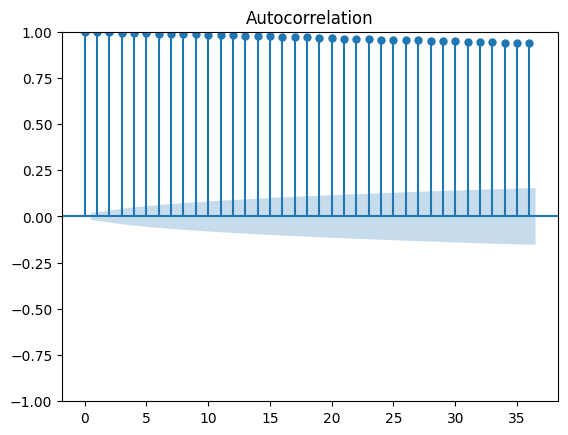

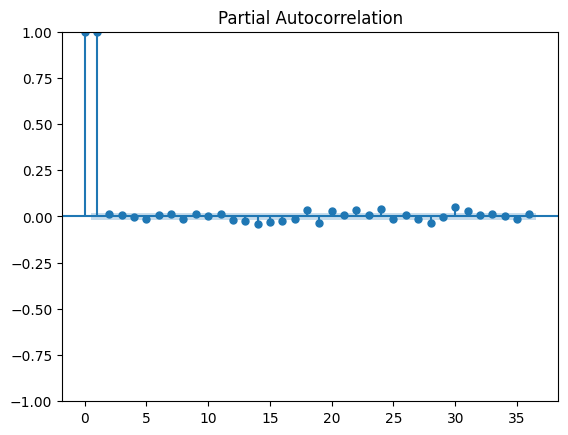

In [258]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_train['Close'], lags=36)
plot_pacf(df_train['Close'], lags=36)
plt.show()

#### Looking for seasonality :

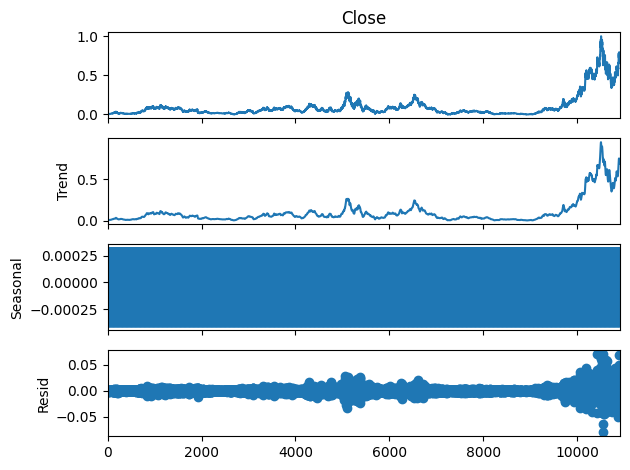

In [259]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Using a lot of data is hard to identify the seasonality.

decompose = seasonal_decompose(df_train['Close'], period = 12)
decompose.plot()
plt.show()

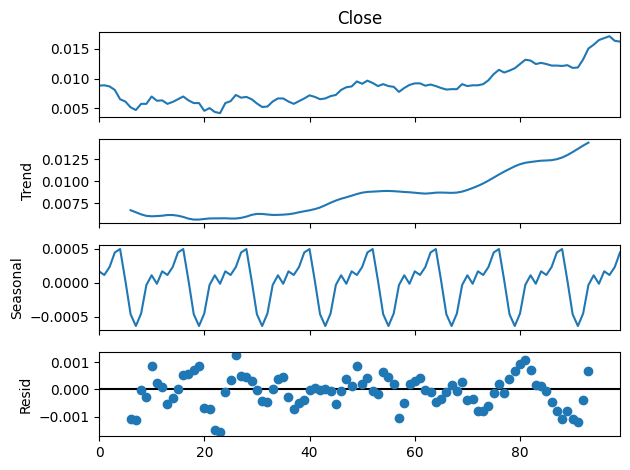

In [260]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Using less data we can see that data has a seasonality of 12.
decompose = seasonal_decompose(df_train.iloc[:100, 1], period = 12)
decompose.plot()
plt.show()

#### Creating the window :

In [261]:
def create_window(data, window_size=1) -> np.ndarray:
    X, y = [], []
    try:
        for i in range(len(data) - window_size):
            X.append(data[i:i + window_size])
            y.append(data[i + window_size])
    except Exception as e:
        print(f'Error: {e}')
    return np.array(X), np.array(y)

In [262]:
#Calculating the size of the training set
size_train = int(0.85 * len(df_train))

# Slicing the data correctly
X_train, y_train = create_window(df_train.iloc[:size_train, 1].values, window_size=12)
X_val, y_val = create_window(df_train.iloc[size_train:, 1].values, window_size=12)

In [263]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_test shape: {y_val.shape}')

X_train shape: (9269, 12)
y_train shape: (9269,)
X_val shape: (1626, 12)
y_test shape: (1626,)


In [264]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [265]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_test shape: {y_val.shape}')

X_train shape: (9269, 12, 1)
y_train shape: (9269,)
X_val shape: (1626, 12, 1)
y_test shape: (1626,)


#### First we will build a RNN and a LSTM to see how they predict the test values :

In [266]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout

In [267]:
# Defining RNN model
model_RNN = Sequential()
model_RNN.add(SimpleRNN(units=128, input_shape=(X_train.shape[1], 1), return_sequences=True))
model_RNN.add(SimpleRNN(units=32))
model_RNN.add(Dense(units=64, activation='relu'))
model_RNN.add(Dropout(0.2))
model_RNN.add(Dense(units=32, activation='relu'))
model_RNN.add(Dropout(0.2))

model_RNN.add(Dense(units=1))

# Compile the model
model_RNN.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display the model summary
model_RNN.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)             │ (None, 12, 128)             │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 32)                  │           5,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,017 (101.63 KB)

 Trainable params: 26,017 (101.63 KB)

 Non-trainable params: 0 (0.00 B)

In [268]:
# Get total number of parameters
total_params_RNN = model_RNN.count_params()
print(f'Total number of parameters: {total_params_RNN}')

Total number of parameters: 26017


In [269]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

In [270]:
%time

# Define the callbacks
#early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint_RNN = ModelCheckpoint('best_model_RNN.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)
reduce_lr_RNN = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
tensorboard_RNN = TensorBoard(log_dir='./logs', histogram_freq=1)


# Training the Model and store history
history_RNN = model_RNN.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data = (X_val, y_val),
                    callbacks=[model_checkpoint_RNN, reduce_lr_RNN, tensorboard_RNN])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs
Epoch 1/10
290/290 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 9.4423e-04 - mae: 0.0179 - val_loss: 0.0222 - val_mae: 0.1084 - learning_rate: 0.0010
Epoch 2/10
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2.0927e-04 - mae: 0.0095 - val_loss: 0.0109 - val_mae: 0.0759 - learning_rate: 0.0010
Epoch 3/10
290/290 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 1.4049e-04 - mae: 0.0081 - val_loss: 0.0228 - val_mae: 0.1092 - learning_rate: 0.0010
Epoch 4/10
290/290 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1.2928e-04 - mae: 0.0078 - val_loss: 0.0108 - val_mae: 0.0735 - learning_rate: 0.0010
Epoch 5/10
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.2004e-04 - mae: 0.0072 - val_loss: 0.0073 - val_mae: 0.0612 - learning_rate: 0.0010
Epoch 6/10
290/290 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 1.0240e-04 - mae: 0.0068 - val_loss: 0.0123 - val_mae: 0.0819 - learning_rate: 0.0010
Epoch 7/10
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step -

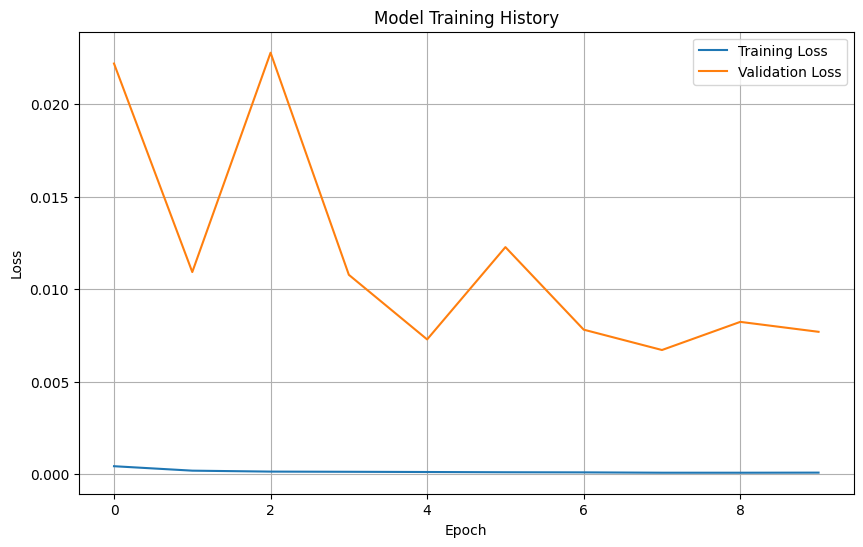

In [271]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_RNN.history['loss'], label='Training Loss')
plt.plot(history_RNN.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### Creating a window just for my predictions data :

In [272]:
def create_prediction_windows(data, window_size=1) -> np.ndarray:
    X = []
    for i in range(len(data) - window_size):  # Adjusted range for prediction
        X.append(data[i:i + window_size])
    return np.array(X)


In [273]:
X_train_to_pred = create_prediction_windows(df_train.iloc[:, 1].values, window_size=12)
X_train_to_pred.shape

(10907, 12)

In [274]:
X_train_to_pred = X_train_to_pred.reshape(X_train_to_pred.shape[0], X_train_to_pred.shape[1], 1)
X_train_to_pred.shape

(10907, 12, 1)

#### Predicting my model:

In [275]:
pred_train_RNN = model_RNN.predict(X_train_to_pred)
pred_train_RNN = scaler.inverse_transform(pred_train_RNN)

341/341 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


In [276]:
df_train

,Date,Close
0,1980-03-18 00:00:00,0.008804
1,1980-03-19 00:00:00,0.008869
2,1980-03-20 00:00:00,0.008674
3,1980-03-21 00:00:00,0.008090
4,1980-03-24 00:00:00,0.006530
...,...,...
10914,2023-07-03 00:00:00,0.712459
10915,2023-07-05 00:00:00,0.700792
10916,2023-07-06 00:00:00,0.697860
10917,2023-07-07 00:00:00,0.695926


In [277]:
df_train.iloc[:,1] = scaler.inverse_transform(df_train.iloc[:,1].values.reshape(-1, 1))

In [278]:
df_train

,Date,Close
0,1980-03-18 00:00:00,3.031250
1,1980-03-19 00:00:00,3.041667
2,1980-03-20 00:00:00,3.010417
3,1980-03-21 00:00:00,2.916667
4,1980-03-24 00:00:00,2.666667
...,...,...
10914,2023-07-03 00:00:00,115.820000
10915,2023-07-05 00:00:00,113.949997
10916,2023-07-06 00:00:00,113.480003
10917,2023-07-07 00:00:00,113.169998


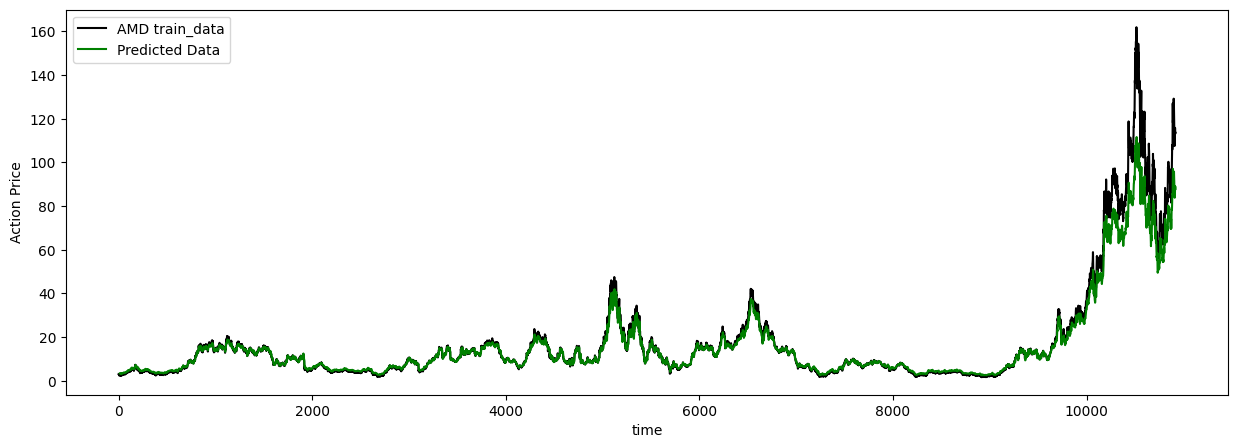

In [279]:
plt.figure(figsize=(15,5))
plt.plot(range(0, df_train.shape[0]), df_train['Close'], color = 'black', label='AMD train_data')
plt.plot(range(12, pred_train_RNN.shape[0] + 12), pred_train_RNN, color = 'green', label = 'Predicted Data')
plt.xlabel('time')
plt.ylabel('Action Price')
plt.legend()
plt.show()

#### Focusing in validation data :

In [280]:
df_validation_scaled = scaler.fit_transform(df_train.iloc[size_train:, 1].values.reshape(-1,1))
df_validation_scaled

array([[0.01246883],
       [0.01122194],
       [0.01174695],
       ...,
       [0.68217614],
       [0.68014172],
       [0.68283239]])

In [281]:
X_val_pred = create_prediction_windows(df_validation_scaled, window_size=12)

X_val_pred = X_val_pred.reshape(X_val_pred.shape[0], X_val_pred.shape[1], 1)

Val_pred_RNN = model_RNN.predict(X_val_pred)
Val_pred_RNN = scaler.inverse_transform(Val_pred_RNN)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [282]:
Val_pred_RNN

array([[10.572598],
       [10.548854],
       [10.762875],
       ...,
       [91.37835 ],
       [90.764496],
       [90.174126]], dtype=float32)

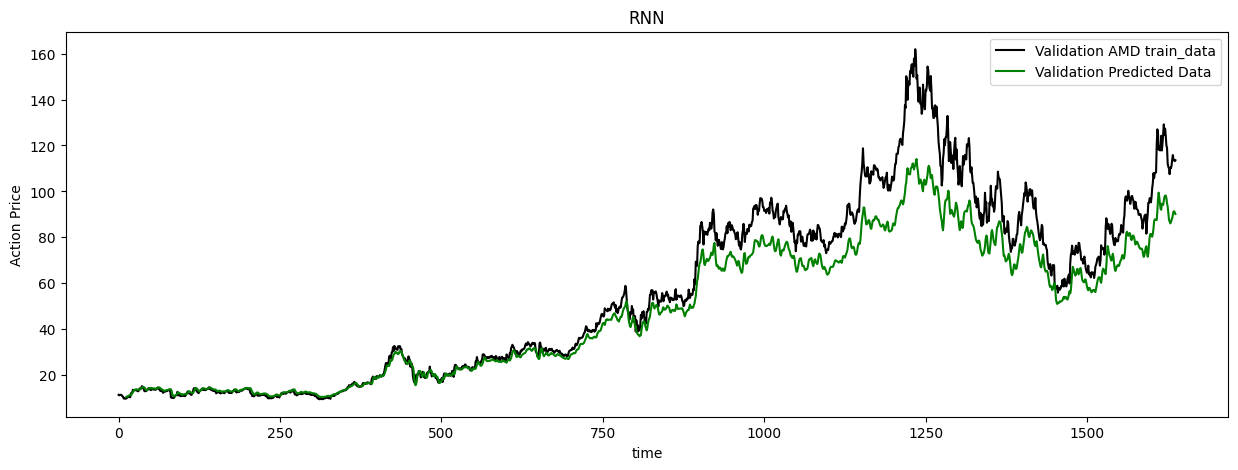

In [283]:
plt.figure(figsize=(15,5))
plt.plot(range(0, df_train.iloc[size_train:,].shape[0]), df_train.iloc[size_train:,1], color = 'black', label='Validation AMD train_data')
plt.plot(range(12, Val_pred_RNN.shape[0] + 12), Val_pred_RNN, color = 'green', label = 'Validation Predicted Data')
plt.title('RNN')
plt.xlabel('time')
plt.ylabel('Action Price')
plt.legend()
plt.show()

#### Using the test data :

In [284]:
# Here i'm converting the dataset to datetime and scaling the values

df_test.loc[:, 'Date'] = pd.to_datetime(df_test['Date'])

In [285]:
df_test.head()

,Date,Close
0,2023-01-03 00:00:00,64.019997
1,2023-01-04 00:00:00,64.660004
2,2023-01-05 00:00:00,62.330002
3,2023-01-06 00:00:00,63.959999
4,2023-01-09 00:00:00,67.239998


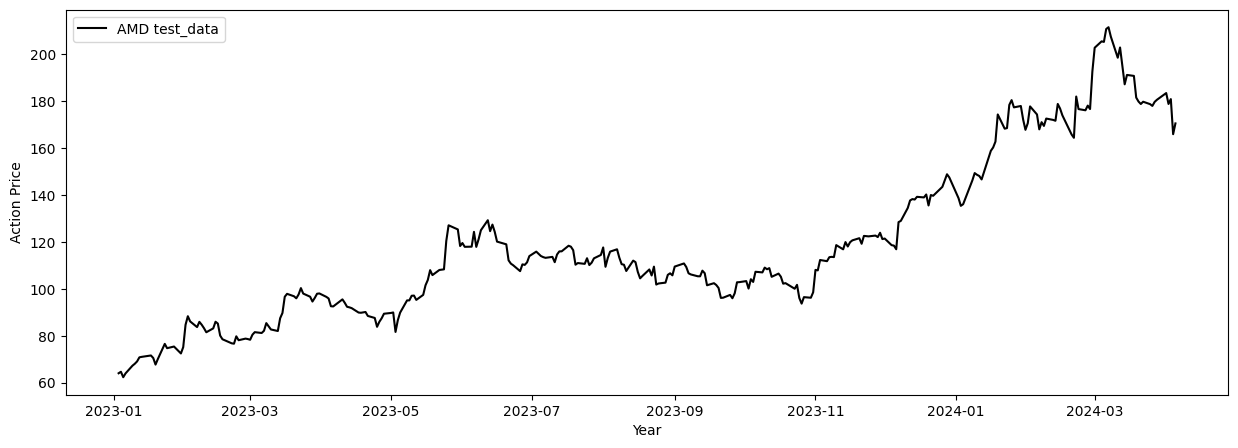

In [286]:
plt.figure(figsize=(15,5))
plt.plot(df_test['Date'], df_test['Close'], color = 'black', label='AMD test_data')
plt.xlabel('Year')
plt.ylabel('Action Price')
plt.legend()
plt.show()

In [287]:
test_scaled =  scaler.fit_transform(df_test.iloc[:, 1].values.reshape(-1,1))

In [288]:
X_test = create_prediction_windows(test_scaled, window_size=12)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

test_pred_RNN = model_RNN.predict(X_test)
test_pred_RNN = scaler.inverse_transform(test_pred_RNN)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


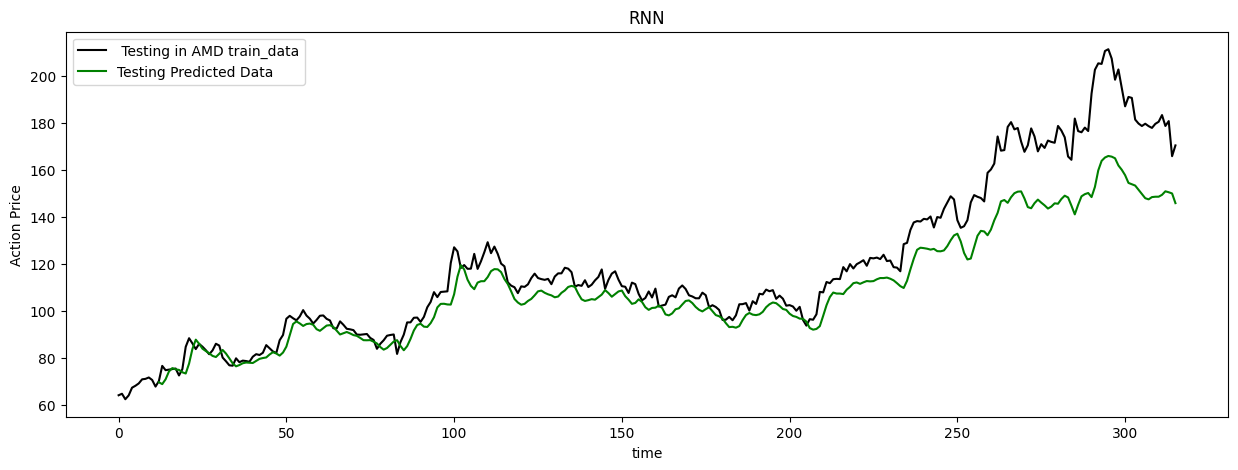

In [289]:
plt.figure(figsize=(15,5))
plt.plot(range(0, df_test.shape[0]), df_test['Close'], color = 'black', label=' Testing in AMD train_data')
plt.plot(range(12, test_pred_RNN.shape[0] + 12), test_pred_RNN, color = 'green', label = 'Testing Predicted Data')
plt.title('RNN')
plt.xlabel('time')
plt.ylabel('Action Price')
plt.legend()
plt.show()

In [290]:
df_test.iloc[:,1]

,Close
0,64.019997
1,64.660004
2,62.330002
3,63.959999
4,67.239998
...,...
311,183.339996
312,178.699997
313,180.770004
314,165.830002


In [291]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_metrics(actual_values, predicted_values):
    # Convert inputs to numpy arrays if they are not already
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(actual_values, predicted_values)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(actual_values, predicted_values)

    return mse, mae

mse_RNN, mae_RNN = calculate_metrics(df_test.iloc[12:,1].values, test_pred_RNN)
print(f'Mean Squared Error (MSE): {mse_RNN}')
print(f'Mean Absolute Error (MAE): {mae_RNN}')


Mean Squared Error (MSE): 230.648241943501
Mean Absolute Error (MAE): 10.667709255835282


#### Now we will use a LSTM to do the same thing :

In [292]:
from tensorflow.keras.layers import LSTM
import keras

model_LSTM = keras.Sequential()
model_LSTM.add(keras.layers.LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_LSTM.add(keras.layers.Dropout(0.2))
model_LSTM.add(keras.layers.LSTM(units=50, return_sequences=True))
model_LSTM.add(keras.layers.Dropout(0.2))
model_LSTM.add(keras.layers.LSTM(units=50, return_sequences=True))
model_LSTM.add(keras.layers.Dropout(0.2))
model_LSTM.add(keras.layers.LSTM(units=50))
model_LSTM.add(keras.layers.Dropout(0.2))
model_LSTM.add(keras.layers.Dense(units=64))
model_LSTM.add(keras.layers.Dropout(0.2))
model_LSTM.add(keras.layers.Dense(units=32))
model_LSTM.add(keras.layers.Dropout(0.2))
model_LSTM.add(keras.layers.Dense(units=16))
model_LSTM.add(keras.layers.Dropout(0.2))
model_LSTM.add(keras.layers.Dense(units=1))


model_LSTM.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 12, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 12, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 12, 50)              │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 12, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 12, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 12, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │           3,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,289 (458.16 KB)

 Trainable params: 117,289 (458.16 KB)

 Non-trainable params: 0 (0.00 B)

In [293]:
# Get total number of parameters
total_params_LSTM = model_LSTM.count_params()
print(f'Total number of parameters: {total_params_LSTM}')

Total number of parameters: 117289


In [306]:
X_train

array([[[0.00880435],
        [0.00886934],
        [0.00867438],
        ...,
        [0.00575   ],
        [0.00698473],
        [0.00626989]],

       [[0.00886934],
        [0.00867438],
        [0.00808951],
        ...,
        [0.00698473],
        [0.00626989],
        [0.00633487]],

       [[0.00867438],
        [0.00808951],
        [0.00652983],
        ...,
        [0.00626989],
        [0.00633487],
        [0.00575   ]],

       ...,

       [[0.05652255],
        [0.05564913],
        [0.05571152],
        ...,
        [0.06213737],
        [0.06519433],
        [0.06195021]],

       [[0.05564913],
        [0.05571152],
        [0.05764552],
        ...,
        [0.06519433],
        [0.06195021],
        [0.06219976]],

       [[0.05571152],
        [0.05764552],
        [0.05639778],
        ...,
        [0.06195021],
        [0.06219976],
        [0.06064009]]])

In [294]:
# Define the callbacks
#early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_LSTM_checkpoint = ModelCheckpoint('best_model_LSTM.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)
reduce_lr_LSTM = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
tensorboard_LSTM = TensorBoard(log_dir='./logs', histogram_freq=1)


# Compiling the LSTM Model
model_LSTM.compile(optimizer='adam', loss='mean_squared_error')

# Training the Model and store history
history_LSTM = model_LSTM.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data = (X_val, y_val),
                    callbacks=[model_LSTM_checkpoint, reduce_lr_LSTM, tensorboard_LSTM])

Epoch 1/10
290/290 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - loss: 7.7750e-04 - val_loss: 0.0036 - learning_rate: 0.0010
Epoch 2/10
290/290 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 2.6758e-04 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 3/10
290/290 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 2.2028e-04 - val_loss: 0.0053 - learning_rate: 0.0010
Epoch 4/10
290/290 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 2.0797e-04 - val_loss: 0.0130 - learning_rate: 0.0010
Epoch 5/10
290/290 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - loss: 1.6880e-04 - val_loss: 0.0035 - learning_rate: 2.0000e-04
Epoch 6/10
290/290 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - loss: 1.5200e-04 - val_loss: 0.0046 - learning_rate: 2.0000e-04
Epoch 7/10
290/290 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 1.2887e-04 - val_loss: 0.0032 - learning_rate: 4.0000e-05
Epoch 8/10
290/290 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - loss: 1.2930e-04 - val_loss: 0.0028 - learning_rate: 4.0000e-05
Epoch 9/10
290/290 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - l

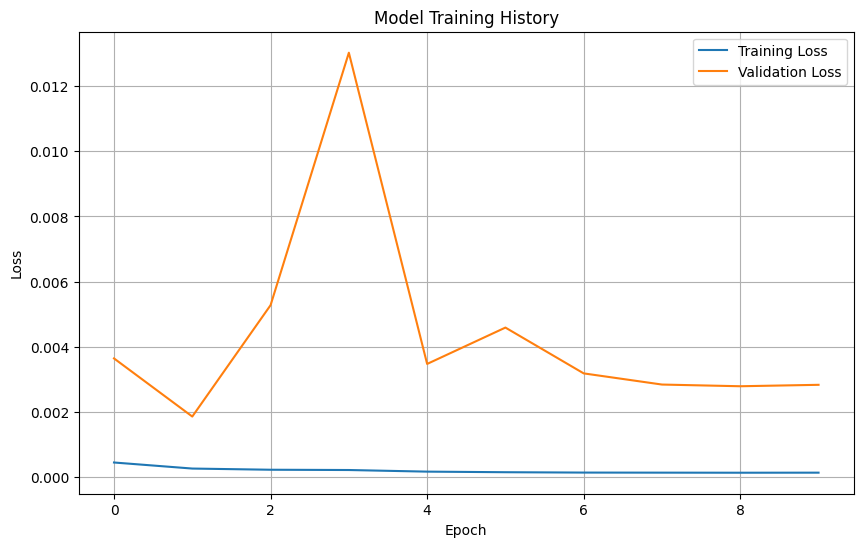

In [295]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_LSTM.history['loss'], label='Training Loss')
plt.plot(history_LSTM.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [296]:
pred_train_LSTM = model_LSTM.predict(X_train_to_pred)
pred_train_LSTM = scaler.inverse_transform(pred_train_LSTM)

341/341 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step


In [297]:
df_train['Close']

,Close
0,3.031250
1,3.041667
2,3.010417
3,2.916667
4,2.666667
...,...
10914,115.820000
10915,113.949997
10916,113.480003
10917,113.169998


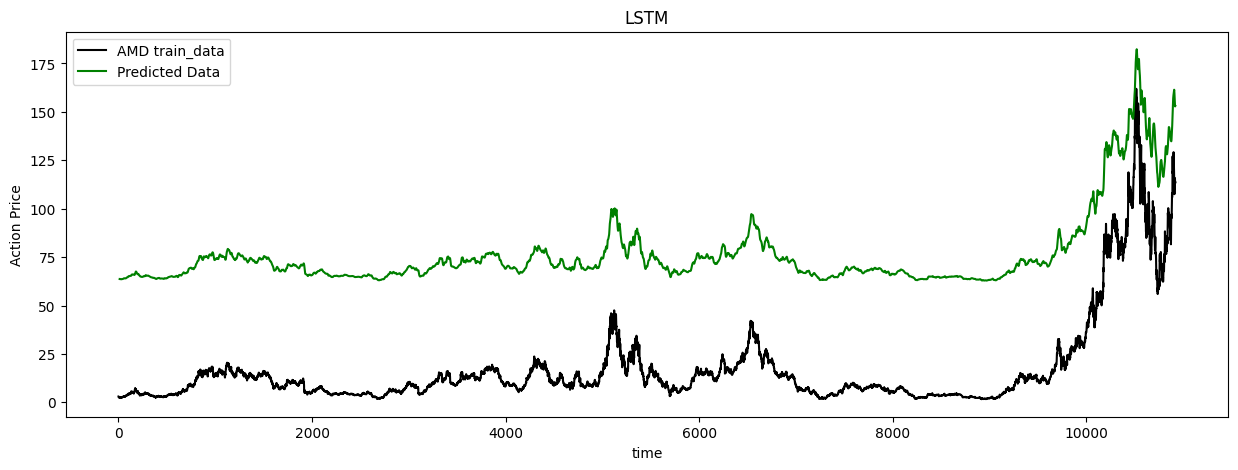

In [298]:
plt.figure(figsize=(15,5))
plt.plot(range(0, df_train.shape[0]), df_train['Close'], color = 'black', label='AMD train_data')
plt.plot(range(12, pred_train_LSTM.shape[0] + 12), pred_train_LSTM, color = 'green', label = 'Predicted Data')
plt.title('LSTM')
plt.xlabel('time')
plt.ylabel('Action Price')
plt.legend()
plt.show()

In [299]:
df_train

,Date,Close
0,1980-03-18 00:00:00,3.031250
1,1980-03-19 00:00:00,3.041667
2,1980-03-20 00:00:00,3.010417
3,1980-03-21 00:00:00,2.916667
4,1980-03-24 00:00:00,2.666667
...,...,...
10914,2023-07-03 00:00:00,115.820000
10915,2023-07-05 00:00:00,113.949997
10916,2023-07-06 00:00:00,113.480003
10917,2023-07-07 00:00:00,113.169998


In [311]:
X_val_pred_LSTM = X_val_pred.reshape(X_val_pred.shape[0], X_val_pred.shape[1], 1)

Val_pred_LSTM = model_LSTM.predict(X_val_pred)
Val_pred_LSTM = scaler.inverse_transform(Val_pred_LSTM)

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


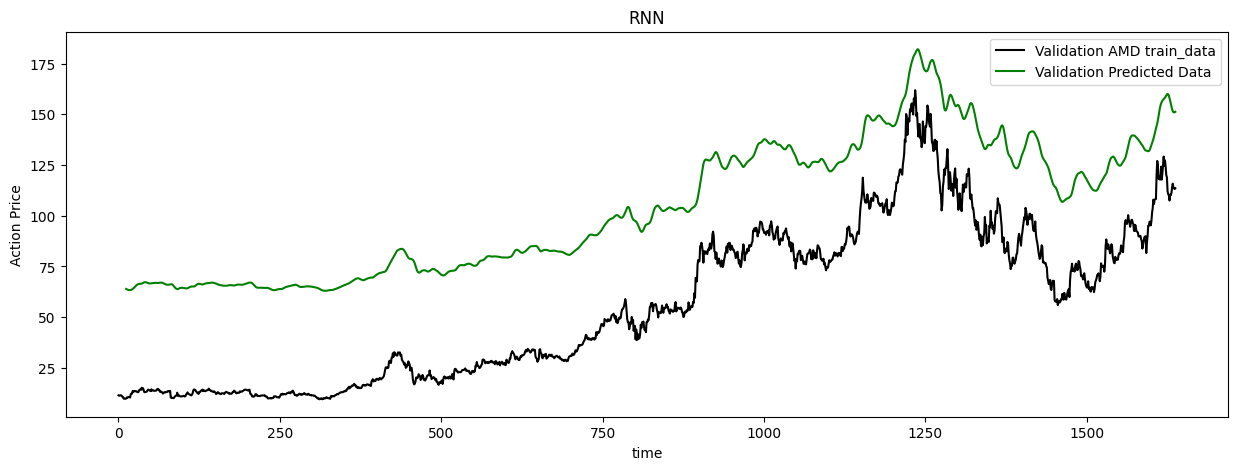

In [312]:
plt.figure(figsize=(15,5))
plt.plot(range(0, df_train.iloc[size_train:,].shape[0]), df_train.iloc[size_train:,1], color = 'black', label='Validation AMD train_data')
plt.plot(range(12, Val_pred_LSTM.shape[0] + 12), Val_pred_LSTM, color = 'green', label = 'Validation Predicted Data')
plt.title('RNN')
plt.xlabel('time')
plt.ylabel('Action Price')
plt.legend()
plt.show()

In [302]:
test_pred_LSTM = model_LSTM.predict(X_test)
test_pred_LSTM = scaler.inverse_transform(test_pred_LSTM)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


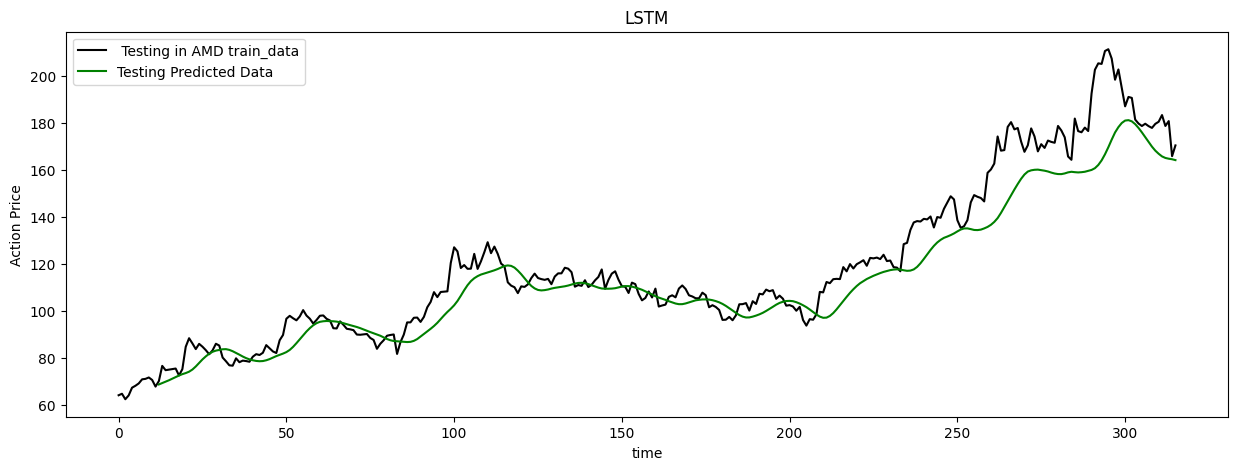

In [303]:
plt.figure(figsize=(15,5))
plt.plot(range(0, df_test.shape[0]), df_test['Close'], color = 'black', label=' Testing in AMD train_data')
plt.plot(range(12, test_pred_LSTM.shape[0] + 12), test_pred_LSTM, color = 'green', label = 'Testing Predicted Data')
plt.title('LSTM')
plt.xlabel('time')
plt.ylabel('Action Price')
plt.legend()
plt.show()

In [304]:
mse_LSTM, mae_LSTM = calculate_metrics(df_test.iloc[12:,1].values, test_pred_LSTM)
print(f'Mean Squared Error (MSE): {mse_LSTM}')
print(f'Mean Absolute Error (MAE): {mae_LSTM}')

Mean Squared Error (MSE): 133.71723143206583
Mean Absolute Error (MAE): 8.310947254285312


In [305]:
print(f'The MSE of RNN is : {mse_RNN}')
print(f'The MSE of LSTM is : {mse_LSTM}')
print(f'The MAE of RNN is : {mae_RNN}')
print(f'The MAE of LSTM is : {mae_LSTM}')

The MSE of RNN is : 230.648241943501
The MSE of LSTM is : 133.71723143206583
The MAE of RNN is : 10.667709255835282
The MAE of LSTM is : 8.310947254285312
